In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gstatsMCMC import Topography
from gstatsMCMC import MCMC
import gstatsim as gs

In [2]:
# load compiled bed elevation measurements
df = pd.read_csv('TottenDataGridded_geoidcorrected.csv')

In [3]:
# create a grid of x and y coordinates
x_uniq = np.unique(df.x)
y_uniq = np.unique(df.y)

xmin = np.min(x_uniq)
xmax = np.max(x_uniq)
ymin = np.min(y_uniq)
ymax = np.max(y_uniq)

cols = len(x_uniq)
rows = len(y_uniq)

resolution = 500

xx, yy = np.meshgrid(x_uniq, y_uniq)

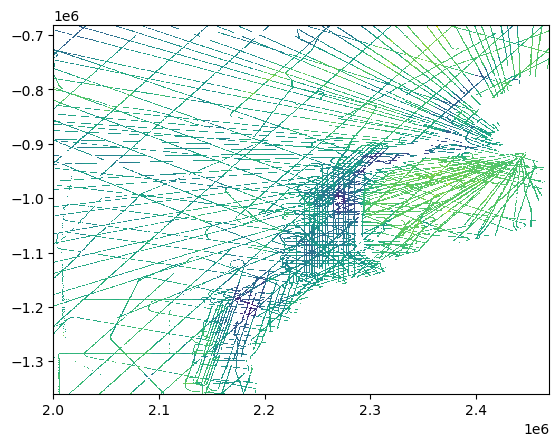

In [4]:
plt.pcolormesh(xx,yy,df['bed'].values.reshape(xx.shape))

In [4]:
df

,x,y,surf,bed,velx,vely,smb,dhdt,highvel_mask,bedmap_mask,bedmap_surf,bedmachine_source,bedmachine_thickness,bedmap_bed,bedmachine_bed
0,2000250,-1360250,1783.0,NaN,8.695986,-3.143834,0.296273,0.076341,False,1.0,1783.0,5.0,1815.873352,-51.0,-51.129169
1,2000750,-1360250,1780.0,NaN,9.281768,-3.207487,0.296079,0.077643,False,1.0,1780.0,5.0,1814.405029,-56.0,-52.297773
2,2001250,-1360250,1777.0,NaN,9.601063,-3.365670,0.295885,0.078945,False,1.0,1777.0,5.0,1812.939758,-62.0,-53.431056
3,2001750,-1360250,1775.0,NaN,9.815087,-3.346987,0.295691,0.079837,False,1.0,1775.0,5.0,1811.481018,-66.0,-54.667591
4,2002250,-1360250,1772.0,NaN,9.020999,-3.840006,0.295497,0.079837,False,1.0,1772.0,5.0,1810.018921,-71.0,-56.101878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278395,2467750,-680750,1267.0,NaN,9.091757,-2.037412,0.379975,-0.054564,False,1.0,1267.0,5.0,1261.474854,61.0,-10.886635
1278396,2468250,-680750,1262.0,NaN,10.617538,-2.643307,0.381622,-0.055866,False,1.0,1262.0,5.0,1245.532166,63.0,0.096743
1278397,2468750,-680750,1257.0,NaN,10.294378,-3.120382,0.383269,-0.057168,False,1.0,1257.0,5.0,1230.323120,66.0,9.088055
1278398,2469250,-680750,1249.0,NaN,11.114619,-3.396946,0.384916,-0.058470,False,1.0,1249.0,5.0,1215.767944,66.0,15.735130


In [5]:
df_cropped = df[(df['x']>2300000)&(df['x']<2470000)&(df['y']>-950000)&(df['y']<-800000)].copy()

In [6]:
df_cropped

,x,y,surf,bed,velx,vely,smb,dhdt,highvel_mask,bedmap_mask,bedmap_surf,bedmachine_source,bedmachine_thickness,bedmap_bed,bedmachine_bed
772340,2300250,-949750,819.0,NaN,-6.227225,-0.706508,0.581114,-0.402611,False,1.0,819.0,5.0,1987.590454,-1216.0,-1188.700207
772341,2300750,-949750,822.0,NaN,-3.019768,0.308041,0.574906,-0.394798,False,1.0,822.0,5.0,1954.987793,-1174.0,-1153.642561
772342,2301250,-949750,824.0,NaN,-2.443757,-1.284893,0.568684,-0.385911,False,1.0,824.0,5.0,1924.964508,-1134.0,-1121.498793
772343,2301750,-949750,826.0,NaN,-2.790258,-0.954486,0.562463,-0.376693,False,1.0,826.0,5.0,1896.364746,-1095.0,-1090.532395
772344,2302250,-949750,828.0,NaN,1.754004,0.585472,0.556241,-0.368880,False,1.0,828.0,5.0,1871.099457,-1060.0,-1063.006878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053735,2467750,-800250,NaN,NaN,NaN,NaN,0.189398,NaN,False,NaN,NaN,1.0,506.753677,-507.0,-506.442020
1053736,2468250,-800250,NaN,NaN,NaN,NaN,0.191458,NaN,False,NaN,NaN,1.0,510.239410,-510.0,-509.934036
1053737,2468750,-800250,NaN,NaN,NaN,NaN,0.193519,NaN,False,NaN,NaN,1.0,514.158875,-514.0,-513.859782
1053738,2469250,-800250,NaN,NaN,NaN,NaN,0.195579,NaN,False,NaN,NaN,1.0,518.236053,-518.0,-517.943243


In [7]:
# create a grid of x and y coordinates
x_uniq = np.unique(df_cropped.x)
y_uniq = np.unique(df_cropped.y)

xmin = np.min(x_uniq)
xmax = np.max(x_uniq)
ymin = np.min(y_uniq)
ymax = np.max(y_uniq)

cols = len(x_uniq)
rows = len(y_uniq)

resolution = 500

xx, yy = np.meshgrid(x_uniq, y_uniq)

(2300000.0, 2470000.0, -950000.0, -800000.0)

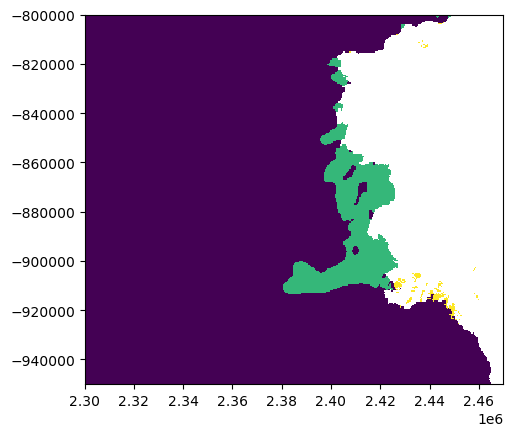

In [8]:
plt.pcolormesh(xx,yy,df_cropped['bedmap_mask'].values.reshape(xx.shape))
plt.axis('scaled')

(2300000.0, 2470000.0, -950000.0, -800000.0)

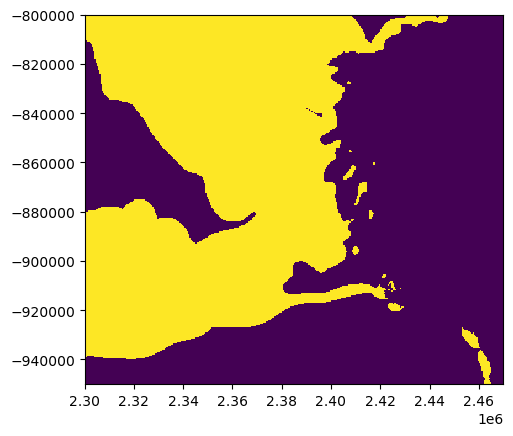

In [9]:
plt.pcolormesh(xx,yy,df_cropped['highvel_mask'].values.reshape(xx.shape))
plt.axis('scaled')

(2300000.0, 2470000.0, -950000.0, -800000.0)

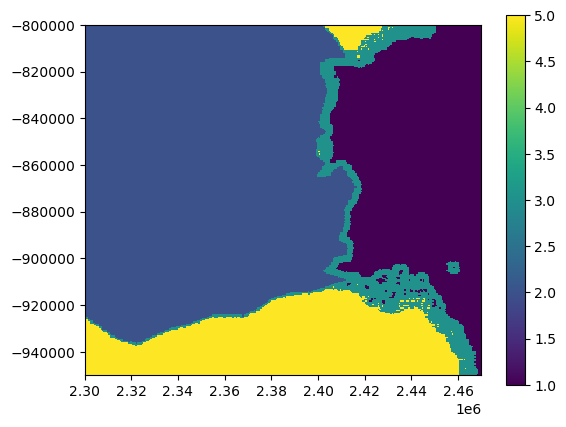

In [10]:
plt.pcolormesh(xx,yy,df_cropped['bedmachine_source'].values.reshape(xx.shape))
plt.colorbar()
plt.axis('scaled')

In [41]:
df_cropped.to_csv('TottenDataGridded_cropped.csv')